In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the files | Վերբեռնում ենք ֆայլերը
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Ստուգում ենք կորած տվյալները | Check missing values
print(df_train.isnull().sum().sort_values(ascending=False))
print(df_test.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64
PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
                 ... 
EnclosedPorch       0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 80, dtype: int64


In [6]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Fill categorical features with "None" | Կատեգորիկ փոփոխականների լրացում "None"-ով
for col in ["PoolQC", "Alley", "Fence", "FireplaceQu", "MiscFeature"]:
    df_train[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

In [10]:
# Fill categorical feature (Electrical) with the most frequent value | Կատեգորիկ փոփոխականի (Electrical) լրացում ամենահաճախ հանդիպող արժեքով
df_train["Electrical"].fillna(df_train["Electrical"].mode()[0], inplace=True)
df_test["Electrical"].fillna(df_test["Electrical"].mode()[0], inplace=True)

/tmp/ipykernel_43512/1164357920.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Electrical"].fillna(df_test["Electrical"].mode()[0], inplace=True)


In [12]:
# Fill missing values in numerical features with median | Թվային փոփոխականների լրացում մեդիանով (median)
for col in ["GarageYrBlt", "MasVnrArea"]:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

/tmp/ipykernel_43512/1600112191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].median(), inplace=True)
/tmp/ipykernel_43512/1600112191.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [14]:
# Fill missing values in basement-related features with 0 | Ստորգետնյա տարածքների լրացում 0-ով
for col in ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]:
    df_train[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

/tmp/ipykernel_43512/1768039537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(0, inplace=True)
/tmp/ipykernel_43512/1768039537.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [15]:
# Fill missing values in `LotFrontage` using `RandomForestRegressor` | LotFrontage-ի լրացում `RandomForestRegressor`-ով
lot_train = df_train[["LotFrontage", "LotArea", "Neighborhood"]].copy()
lot_test = df_test[["LotFrontage", "LotArea", "Neighborhood"]].copy()

In [16]:
# Encode the `Neighborhood` feature using One-Hot Encoding | Կոդավորում ենք `Neighborhood` փոփոխականը One-Hot Encoding-ով
lot_train = pd.get_dummies(lot_train, columns=["Neighborhood"])
lot_test = pd.get_dummies(lot_test, columns=["Neighborhood"])

In [17]:
# Ensure train and test have the same columns | Համոզվենք, որ train և test տվյալները ունեն նույն սյունակները
missing_cols = set(lot_train.columns) - set(lot_test.columns)
for col in missing_cols:
    lot_test[col] = 0  # Adding missing columns to test | Ավելացնում ենք բացակայող սյունակները test-ում

In [18]:
# Separate known and missing values in `LotFrontage` | Բաժանում ենք `LotFrontage`-ով չլրացված տվյալները
lot_train_known = lot_train[lot_train["LotFrontage"].notnull()]
lot_train_missing = lot_train[lot_train["LotFrontage"].isnull()]

In [19]:
# Define X (features) and y (target) | Սահմանում ենք X (features) և y (target)
X_train = lot_train_known.drop("LotFrontage", axis=1)
y_train = lot_train_known["LotFrontage"]

In [20]:
# Train a RandomForest model | Ուսուցանում ենք RandomForest մոդելը
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict missing values | Կանխատեսում ենք բաց թողնված արժեքները
lot_train.loc[lot_train["LotFrontage"].isnull(), "LotFrontage"] = rf_model.predict(lot_train_missing.drop("LotFrontage", axis=1))
lot_test.loc[lot_test["LotFrontage"].isnull(), "LotFrontage"] = rf_model.predict(lot_test[lot_test["LotFrontage"].isnull()].drop("LotFrontage", axis=1))

In [22]:
# Update the main DataFrames | Թարմացնում ենք հիմնական DataFrame-երը
df_train["LotFrontage"] = lot_train["LotFrontage"]
df_test["LotFrontage"] = lot_test["LotFrontage"]

In [23]:
# Check that there are no more missing values | Ստուգում ենք, որ այլևս կորած արժեքներ չկան
missing_values_after = df_train.isnull().sum().sum() + df_test.isnull().sum().sum()

In [24]:
missing_values_after

np.int64(2818)

In [31]:
# Fill basement-related features with "None" | Լրացնում ենք "None" արժեքով ստորգետնյա փոփոխականները
for col in ["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual"]:
    df_train[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

In [32]:
# Final check to ensure no missing values remain | Վերջնական ստուգում՝ համոզվելու, որ այլևս կորած արժեքներ չկան
final_missing_values = df_train.isnull().sum().sum() + df_test.isnull().sum().sum()
final_missing_values

np.int64(2092)

In [34]:
# Fill `Exterior1st` and `Exterior2nd` with the most frequent value (mode) | Exterior1st և Exterior2nd → Լրացնում ենք mode-ով (ամենահաճախ հանդիպող արժեքով)
df_train["Exterior1st"].fillna(df_train["Exterior1st"].mode()[0], inplace=True)
df_train["Exterior2nd"].fillna(df_train["Exterior2nd"].mode()[0], inplace=True)
df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0], inplace=True)
df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0], inplace=True)

/tmp/ipykernel_43512/3199027072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Exterior1st"].fillna(df_train["Exterior1st"].mode()[0], inplace=True)
/tmp/ipykernel_43512/3199027072.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [35]:
# Fill `Functional` with "Typ" (most frequent value) | Functional → Լրացնում ենք "Typ" արժեքով (ամենահաճախ հանդիպող)
df_train["Functional"].fillna("Typ", inplace=True)
df_test["Functional"].fillna("Typ", inplace=True)

/tmp/ipykernel_43512/2440218657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Functional"].fillna("Typ", inplace=True)


In [36]:
# Fill `GarageCond` and `GarageFinish` with "None" if garage is missing | GarageCond և GarageFinish → Լրացնում ենք "None"-ով, եթե ավտոտնակ չկա
for col in ["GarageCond", "GarageFinish"]:
    df_train[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

In [37]:
# Final check: Are there any missing values left? | Վերջնական ստուգում՝ կորած արժեքներ մնացե՞լ են
final_missing_values_check = df_train.isnull().sum().sum() + df_test.isnull().sum().sum()
final_missing_values_check

np.int64(2092)

In [38]:
# Final missing values check | Վերջնական կորած տվյալների ստուգում
remaining_missing_values_final_step = df_train.isnull().sum()
remaining_missing_values_final_step = remaining_missing_values_final_step[remaining_missing_values_final_step > 0].sort_values(ascending=False)

remaining_missing_values_test_final_step = df_test.isnull().sum()
remaining_missing_values_test_final_step = remaining_missing_values_test_final_step[remaining_missing_values_test_final_step > 0].sort_values(ascending=False)

# Create a DataFrame for missing values overview | Ստեղծում ենք տվյալների շրջանակ կորած արժեքների համար
missing_data_final_check = pd.DataFrame({
    'Missing Values (Train)': remaining_missing_values_final_step,
    'Missing Values (Test)': remaining_missing_values_test_final_step
})

# Display remaining missing values | Ցուցադրում ենք մնացած կորած տվյալները
missing_data_final_check

,Missing Values (Train),Missing Values (Test)
GarageArea,NaN,1
GarageCars,NaN,1
GarageQual,81.0,78
GarageType,81.0,76
KitchenQual,NaN,1
MSZoning,NaN,4
MasVnrType,872.0,894
SaleType,NaN,1
Utilities,NaN,2


In [40]:
# Fill `GarageQual` and `GarageType` with "None" if garage is missing | GarageQual և GarageType → Լրացնում ենք "None"-ով, եթե ավտոտնակ չկա
for col in ["GarageQual", "GarageType"]:
    df_train[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

In [42]:
# Fill `KitchenQual` with mode (most frequent value) | KitchenQual → Լրացնում ենք mode-ով (ամենահաճախ հանդիպող արժեքով)
df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0], inplace=True)

In [44]:
# Fill `MSZoning` with mode (most frequent value) | MSZoning → Լրացնում ենք mode-ով (ամենահաճախ հանդիպող արժեքով)
df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0], inplace=True)

In [46]:
# Fill `MasVnrType` with "None" if there is no stone veneer | MasVnrType → Լրացնում ենք "None"-ով, եթե քարե շերտ չկա
df_train["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrType"].fillna("None", inplace=True)

In [48]:
# Fill `SaleType` with mode (most frequent value) | SaleType → Լրացնում ենք mode-ով (ամենահաճախ հանդիպող արժեքով)
df_test["SaleType"].fillna(df_test["SaleType"].mode()[0], inplace=True)

In [50]:
# Fill `Utilities` with mode (most frequent value) | Utilities → Լրացնում ենք mode-ով (եթե բոլոր արժեքները նույնն են, կարելի է հեռացնել սյունակը)
df_test["Utilities"].fillna(df_test["Utilities"].mode()[0], inplace=True)

In [51]:
# Final check: Remaining missing values | Վերջնական ստուգում՝ մնացած կորած արժեքները
final_missing_values_after_cleaning = df_train.isnull().sum().sum() + df_test.isnull().sum().sum()
final_missing_values_after_cleaning

np.int64(2)

In [52]:
# Checking remaining missing values | Ստուգում ենք մնացած կորած արժեքները
remaining_missing = df_train.isnull().sum()[df_train.isnull().sum() > 0]
remaining_missing_test = df_test.isnull().sum()[df_test.isnull().sum() > 0]

print("remaining missing values (Train):")
print(remaining_missing)

print("\n remaining missing values (Test):")
print(remaining_missing_test)

remaining missing values (Train):
Series([], dtype: int64)

 remaining missing values (Test):
GarageCars    1
GarageArea    1
dtype: int64


In [54]:
# Fill `GarageCars` and `GarageArea` with 0, assuming there is no garage | Լրացնում ենք 0-ով, ենթադրելով, որ ավտոտնակ չկա
df_test["GarageCars"].fillna(0, inplace=True)
df_test["GarageArea"].fillna(0, inplace=True)

/tmp/ipykernel_43512/3024783846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["GarageCars"].fillna(0, inplace=True)
/tmp/ipykernel_43512/3024783846.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [55]:
# Final check: Are there any missing values left? | Վերջնական ստուգում՝ կա՞ն արդյոք մնացած կորած տվյալներ
final_missing_values_check = df_test.isnull().sum().sum()
final_missing_values_check

np.int64(0)

/tmp/ipykernel_43512/1193781059.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features_fixed.index, y=top_corr_features_fixed.values, palette="coolwarm")


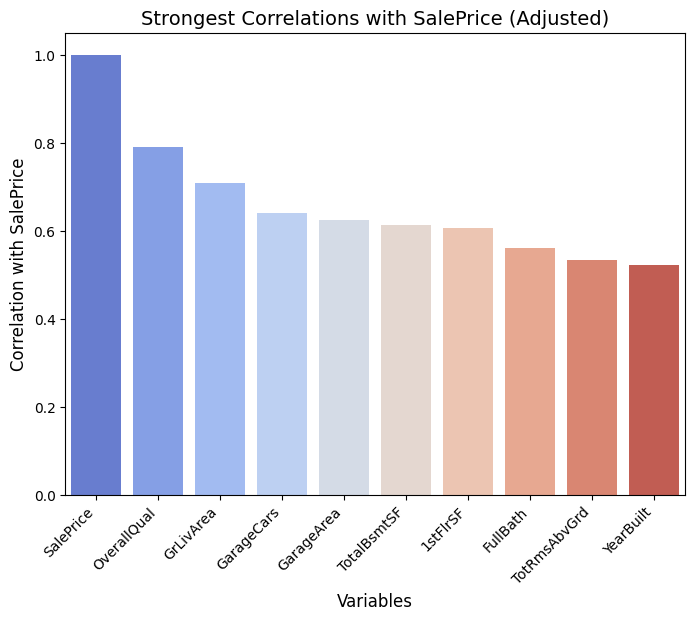

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [58]:
# Keep only numeric columns for correlation calculation | Թողնում ենք միայն թվային սյունակները կոռելյացիայի հաշվարկի համար
df_train_numeric = df_train.select_dtypes(include=[np.number])

# Recalculate the correlation matrix | Վերագործարկում ենք կոռելյացիայի հաշվարկը
correlation_matrix_fixed = df_train_numeric.corr()

# Extract top 10 features most correlated with SalePrice | Ցուցադրում ենք 10 ամենաուժեղ կապ ունեցող փոփոխականները
top_corr_features_fixed = correlation_matrix_fixed["SalePrice"].sort_values(ascending=False).head(10)

# Visualize the strongest correlations with SalePrice | Վիզուալիզացնում ենք ամենաուժեղ կապ ունեցող փոփոխականները
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr_features_fixed.index, y=top_corr_features_fixed.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Strongest Correlations with SalePrice (Adjusted)", fontsize=14) 
plt.xlabel("Variables", fontsize=12) 
plt.ylabel("Correlation with SalePrice", fontsize=12) 
plt.show()

# Display top 10 most correlated features | Ցուցադրում ենք 10 ամենաուժեղ կապ ունեցող փոփոխականները
top_corr_features_fixed

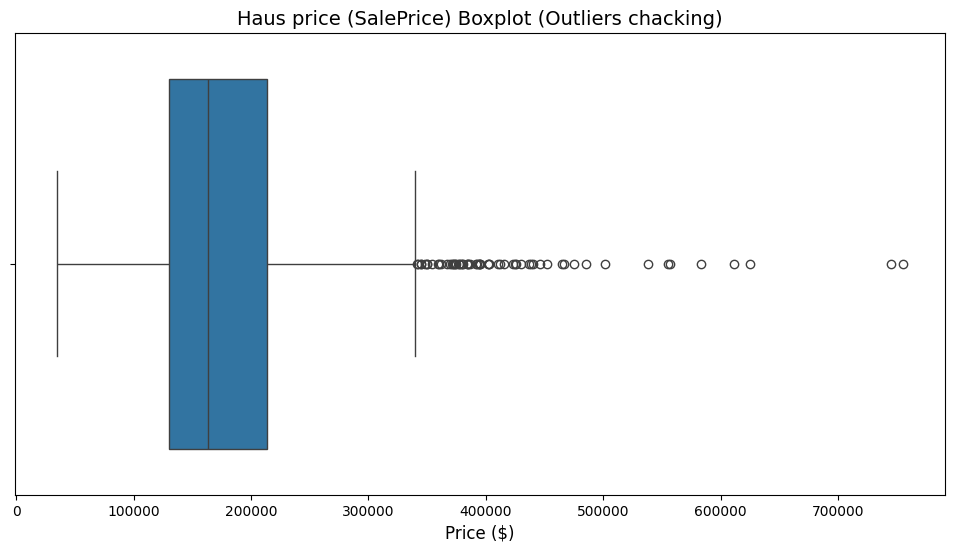

In [59]:
# Detecting outliers using Boxplot | Outlier-ների հայտնաբերում՝ Boxplot-ի միջոցով
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["SalePrice"])
plt.title("Haus price (SalePrice) Boxplot (Outliers chacking)", fontsize=14)
plt.xlabel("Price ($)", fontsize=12)
plt.show()

In [60]:
# Detecting outliers using Z-Score | Outlier-ների հայտնաբերում՝ Z-Score մեթոդով
from scipy.stats import zscore

In [61]:
# Select key numerical features for outlier detection | Ընտրում ենք հիմնական թվային փոփոխականները
num_features = ["SalePrice", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF"]
df_train_numeric_selected = df_train[num_features]

In [62]:
# Compute Z-score for the selected features | Հաշվարկում ենք Z-score
z_scores = np.abs(zscore(df_train_numeric_selected))

In [63]:
# Define threshold (values above this are outliers) | Մշակման սահման (3 ստանդարտ շեղումից բարձր համարվում է outlier)
threshold = 3

In [64]:
# Count number of outliers for each feature | Outlier-ների քանակը ըստ փոփոխականի
outliers = (z_scores > threshold).sum(axis=0)

In [65]:
# Display the number of outliers for each selected feature | Ցուցադրում ենք outlier-ների քանակը ըստ փոփոխականի
outliers

array([22, 16,  0, 10, 12])

In [66]:
# Հեռացնում ենք `SalePrice`, `GrLivArea`, `TotalBsmtSF`, `1stFlrSF` outlier-ները (Z-score > 3)
threshold = 3
z_scores_filtered = np.abs(zscore(df_train[["SalePrice", "GrLivArea", "TotalBsmtSF", "1stFlrSF"]]))

# Ստեղծում ենք outlier-ների դիմաց քողարկող (filter) պայման
outlier_mask = (z_scores_filtered < threshold).all(axis=1)

# Հեռացնում ենք outlier-ները
df_train_cleaned = df_train[outlier_mask].reset_index(drop=True)

# Հաստատենք՝ քանի շարք հեռացվեց
rows_removed = df_train.shape[0] - df_train_cleaned.shape[0]
rows_removed


36

In [67]:
from sklearn.preprocessing import LabelEncoder

In [69]:
# Reload train and test data to fix encoding issues | Վերաբացում ենք train և test-ի տվյալները, որոնք սխալ տվեցին
df_train_encoded = df_train_cleaned.copy()
df_test_encoded = df_test.copy()

# Identify categorical features | Նույնականացնում ենք կատեգորիկ փոփոխականները
categorical_features = df_train_encoded.select_dtypes(include=["object"]).columns.tolist()

# New approach for categorical features | Կատեգորիկ փոփոխականների նոր մոտեցում
label_encoders = {}
for col in categorical_features:
    if df_train_encoded[col].nunique() <= 3:  # Փոքր թվով արժեքների դեպքում Label Encoding
        le = LabelEncoder()
        df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

        # Checking new values in test | Ստուգում ենք test-ում նոր արժեքներ
        df_test_encoded[col] = df_test_encoded[col].apply(lambda x: x if x in le.classes_ else "Unknown")

        
        # Updating LabelEncoder to recognize "Unknown" | Թարմացնում ենք LabelEncoder-ը, որպեսզի "Unknown"-ը ճանաչի
        le.classes_ = np.append(le.classes_, "Unknown")
        df_test_encoded[col] = le.transform(df_test_encoded[col])
        
        label_encoders[col] = le
    else:
        # One-Hot Encoding for other variables | One-Hot Encoding այլ փոփոխականների համար
        df_train_encoded = pd.get_dummies(df_train_encoded, columns=[col], drop_first=True)
        df_test_encoded = pd.get_dummies(df_test_encoded, columns=[col], drop_first=True)

# Ensure Train and Test have the same columns | Համոզվում ենք, որ Train և Test-ում նույն սյունակներն են
missing_cols = set(df_train_encoded.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0  # Ավելացնում ենք բացակայող սյունակները test-ում

# Rearranging the columns of test | Վերադասավորում ենք test-ի սյունակները
df_test_encoded = df_test_encoded[df_train_encoded.columns[:-1]]  # Չենք ներառում "SalePrice", քանի որ այն label է train-ում

# Final check for remaining categorical features | Վերջնական ստուգում՝ մնացել են կատեգորիկ փոփոխականնե՞ր
remaining_categoricals_fixed = df_train_encoded.select_dtypes(include=["object"]).columns
remaining_categoricals_fixed

Index([], dtype='object')

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Separate X (features) and y (target variable) | Տարբերակում ենք X (features) և y (target variable)
X = df_train_encoded.drop(columns=["SalePrice"])  # Բոլոր հատկանիշները բացի SalePrice-ից
y = df_train_encoded["SalePrice"]  # Թիրախային փոփոխականը

# Split into Train (80%) and Validation (20%) sets | Բաժանում ենք Train (80%) և Validation (20%) խմբերի
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes of Train and Validation sets | Հաստատենք չափերը
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1139, 254), (285, 254), (1139,), (285,))

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

In [73]:
# Define hyperparameter grid for GridSearch | Սահմանում ենք GridSearch-ի համար hyperparameter-ների տարբեր արժեքներ
param_grid = {
    "n_estimators": [100, 200, 300],       # Number of trees | Ծառերի քանակ
    "max_depth": [3, 5, 7],                # Tree depth | Ծառերի խորություն
    "learning_rate": [0.01, 0.05, 0.1],    # Learning rate | Ուսուցման արագություն
    "subsample": [0.8, 1.0],               # Subsample ratio | Ընդհանուր տվյալների % յուրաքանչյուր ծառի համար
}

In [74]:
# Create XGBoost model | Ստեղծում ենք XGBoost մոդելը
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

In [75]:
# Define GridSearchCV | Սահմանում ենք GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # Փնտրում ենք ամենափոքր MAE-ն
    cv=3,  # Cross-validation (3 մասի բաժանում)
    verbose=1,
    n_jobs=-1,
)

In [76]:
# Train using GridSearchCV | Ուսուցանում ենք GridSearchCV-ով
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [77]:
# Best hyperparameters from GridSearchCV | Լավագույն hyperparameter-ները
best_params_grid = grid_search.best_params_
print("GridSearchCV-ի best hyperparameters՝", best_params_grid)

GridSearchCV-ի best hyperparameters՝ {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [78]:
# Evaluation | Արժեքավորում
from sklearn.metrics import mean_absolute_error
y_pred_grid = grid_search.best_estimator_.predict(X_valid)
mae_grid = mean_absolute_error(y_valid, y_pred_grid)
print(f"GridSearchCV MAE = {mae_grid}")

GridSearchCV MAE = 13058.8193359375


In [79]:
# Define hyperparameter space for RandomizedSearch | Սահմանում ենք RandomizedSearch-ի համար hyperparameter-ների հնարավոր տիրույթները
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],  # Number of trees | Ծառերի քանակ
    "max_depth": [3, 5, 7, 9],  # Tree depth | Ծառերի խորություն
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Learning rate | Ուսուցման արագություն
    "subsample": [0.6, 0.8, 1.0],  # Subsample ratio | Ընդհանուր տվյալների % յուրաքանչյուր ծառի համար
    "colsample_bytree": [0.6, 0.8, 1.0]  # Feature subsampling | Յուրաքանչյուր ծառի համար օգտագործվող հատկանիշների % 
}

# Create XGBoost model | Ստեղծում ենք XGBoost մոդելը
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Define RandomizedSearchCV | Սահմանում ենք RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Փորձարկելու է 20 տարբերակ (փոխես, եթե ուզում ես ավելի շատ կամ քիչ)
    scoring="neg_mean_absolute_error",
    cv=3,  # Cross-validation (3 մասի բաժանում)
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train using RandomizedSearchCV | Ուսուցանում ենք RandomizedSearchCV-ով
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV | Լավագույն hyperparameter-ները
best_params_random = random_search.best_params_
print("RandomizedSearchCV best hyperparameters՝", best_params_random)

# Evaluation | Արժեքավորում
y_pred_random = random_search.best_estimator_.predict(X_valid)
mae_random = mean_absolute_error(y_valid, y_pred_random)
print(f"RandomizedSearchCV MAE = {mae_random}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomizedSearchCV best hyperparameters՝ {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
RandomizedSearchCV MAE = 12392.9521484375


In [80]:
# Use the best model from RandomizedSearchCV | Օգտագործում ենք RandomizedSearchCV-ի լավագույն մոդելը
final_model = random_search.best_estimator_

In [81]:
# Ensure train and test have the same columns | Համոզվում ենք, որ train և test-ում նույն սյունակներն են
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0  # Ավելացնում ենք բացակայող սյունակները test-ում

In [82]:
# Rearrange test columns | Վերադասավորում ենք test-ի սյունակները
df_test_encoded = df_test_encoded[X_train.columns]

In [83]:
# Make predictions on test.csv | Կրկին կատարում ենք կանխատեսումը
test_predictions = final_model.predict(df_test_encoded)

In [84]:
# Create submission.csv file for Kaggle | Ստեղծում ենք Kaggle-ի համար `submission.csv`
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": test_predictions})

In [85]:
# Save submission.csv file | Պահպանում ենք ֆայլը
submission.to_csv("submission.csv", index=False)
print("The final `submission.csv` file has been created!")

The final `submission.csv` file has been created!


In [86]:
df_sub = pd.read_csv("submission.csv")

In [87]:
df_sub

,Id,SalePrice
0,1461,126221.800
1,1462,152982.640
2,1463,179981.140
3,1464,188248.750
4,1465,194104.750
...,...,...
1454,2915,80830.600
1455,2916,80410.836
1456,2917,171464.890
1457,2918,119429.900
